In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_share.csv')
geo = pd.read_csv('Geo_scores.csv')
lambd = pd.read_csv('Lambda_wts.csv')
qset = pd.read_csv('Qset_tats.csv')
instance = pd.read_csv('instance_scores.csv')

# Data Aggregation

In [13]:
train.shape, test.shape, geo.shape, lambd.shape, qset.shape, instance.shape

((227845, 28),
 (56962, 27),
 (1424035, 2),
 (1400, 2),
 (1424035, 2),
 (1424035, 2))

In [14]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              227845 non-null  int64  
 1   Group           227845 non-null  object 
 2   Per1            227845 non-null  float64
 3   Per2            227845 non-null  float64
 4   Per3            227845 non-null  float64
 5   Per4            227845 non-null  float64
 6   Per5            227845 non-null  float64
 7   Per6            227845 non-null  float64
 8   Per7            227845 non-null  float64
 9   Per8            227845 non-null  float64
 10  Per9            227845 non-null  float64
 11  Dem1            227845 non-null  float64
 12  Dem2            227845 non-null  float64
 13  Dem3            227845 non-null  float64
 14  Dem4            227845 non-null  float64
 15  Dem5            227845 non-null  float64
 16  Dem6            227845 non-null  float64
 17  Dem7      

In [16]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              56962 non-null  int64  
 1   Group           56962 non-null  object 
 2   Per1            56962 non-null  float64
 3   Per2            56962 non-null  float64
 4   Per3            56962 non-null  float64
 5   Per4            56962 non-null  float64
 6   Per5            56962 non-null  float64
 7   Per6            56962 non-null  float64
 8   Per7            56962 non-null  float64
 9   Per8            56962 non-null  float64
 10  Per9            56962 non-null  float64
 11  Dem1            56962 non-null  float64
 12  Dem2            56962 non-null  float64
 13  Dem3            56962 non-null  float64
 14  Dem4            56962 non-null  float64
 15  Dem5            56962 non-null  float64
 16  Dem6            56962 non-null  float64
 17  Dem7            56962 non-null 

In [18]:
geo.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [19]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [20]:
lambd.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [21]:
lambd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.0+ KB


In [22]:
qset.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [23]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [24]:
instance.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [25]:
instance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


*Checking mising values in the additional datasets*

In [26]:
geo.isnull().sum()

id               0
geo_score    71543
dtype: int64

In [27]:
qset.isnull().sum()

id                           0
qsets_normalized_tat    103201
dtype: int64

In [28]:
instance.isnull().sum()

id                 0
instance_scores    0
dtype: int64

In [29]:
lambd.isnull().sum()

Group        0
lambda_wt    0
dtype: int64

In [30]:
train.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [31]:
def remove_dupes(df):
    df = df.fillna(df.median())
    idx = df.columns[0]
    df_ = df.groupby(idx).mean()
    return df_

In [32]:
geo_ = remove_dupes(geo)
qset_ = remove_dupes(qset)
instance_ = remove_dupes(instance)
lambd_ = remove_dupes(lambd)

In [33]:
def getTransformedData(*idsets, X, grp):
    temp = idsets[0]
    for index in range(1, len(idsets)):
        df = temp.merge(idsets[index], on ='id')
        temp = idsets[index]
        df = df.merge(X, on='id', how='right')
        df = df.merge(grp, on='Group', how='left')
    return df

In [34]:
test_ = getTransformedData(geo_, qset_, instance_, X=test, grp=lambd_)
train_ = getTransformedData(geo_, qset_, instance_, X=train, grp=lambd_)

In [35]:
train_.head()

,id,qsets_normalized_tat,instance_scores,Group,Per1,Per2,Per3,Per4,Per5,Per6,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt
0,112751,-0.700,-0.06,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,-0.13
1,18495,0.140,0.52,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,0.66
2,23915,-0.430,1.56,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,-0.51
3,50806,-0.302,0.70,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,0.72
4,184244,-0.630,-0.47,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,0.60


In [36]:
test_.head()

,id,qsets_normalized_tat,instance_scores,Group,Per1,Per2,Per3,Per4,Per5,Per6,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt
0,146574,-0.426,-0.04,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.76
1,268759,-0.620,-0.77,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.18
2,59727,-0.406,0.11,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,0.39
3,151544,0.374,0.33,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,1.80
4,155008,-0.130,-0.37,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,1.89


# Data Analysis

In [37]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    227845 non-null  int64  
 1   qsets_normalized_tat  227845 non-null  float64
 2   instance_scores       227845 non-null  float64
 3   Group                 227845 non-null  object 
 4   Per1                  227845 non-null  float64
 5   Per2                  227845 non-null  float64
 6   Per3                  227845 non-null  float64
 7   Per4                  227845 non-null  float64
 8   Per5                  227845 non-null  float64
 9   Per6                  227845 non-null  float64
 10  Per7                  227845 non-null  float64
 11  Per8                  227845 non-null  float64
 12  Per9                  227845 non-null  float64
 13  Dem1                  227845 non-null  float64
 14  Dem2                  227845 non-null  float64
 15  

In [38]:
#Id, Group columns can be deleted
#Lets check the descriptive stats

train_cp = train_.drop(columns = ['id', 'Group'], axis=1)
train_cp.describe().T

,count,mean,std,min,25%,50%,75%,max
qsets_normalized_tat,227845.0,0.001346,0.850169,-25.156000,-0.480000,-0.066000,0.400000,8.540000
instance_scores,227845.0,-0.000123,1.091488,-24.590000,-0.540000,-0.090000,0.450000,23.750000
Per1,227845.0,0.666006,0.654133,-18.136667,0.360000,0.670000,1.103333,1.483333
Per2,227845.0,0.667701,0.548305,-23.573333,0.470000,0.690000,0.933333,8.020000
Per3,227845.0,0.666315,0.506357,-15.443333,0.370000,0.726667,1.010000,3.793333
Per4,227845.0,0.666687,0.471956,-1.226667,0.383333,0.660000,0.913333,6.163333
Per5,227845.0,0.666723,0.461393,-37.246667,0.436667,0.650000,0.870000,12.266667
Per6,227845.0,0.667378,0.444573,-8.053333,0.410000,0.576667,0.800000,25.100000
Per7,227845.0,0.666934,0.415657,-13.853333,0.483333,0.680000,0.856667,40.863333
Per8,227845.0,0.666279,0.401546,-23.740000,0.596667,0.673333,0.776667,7.336667


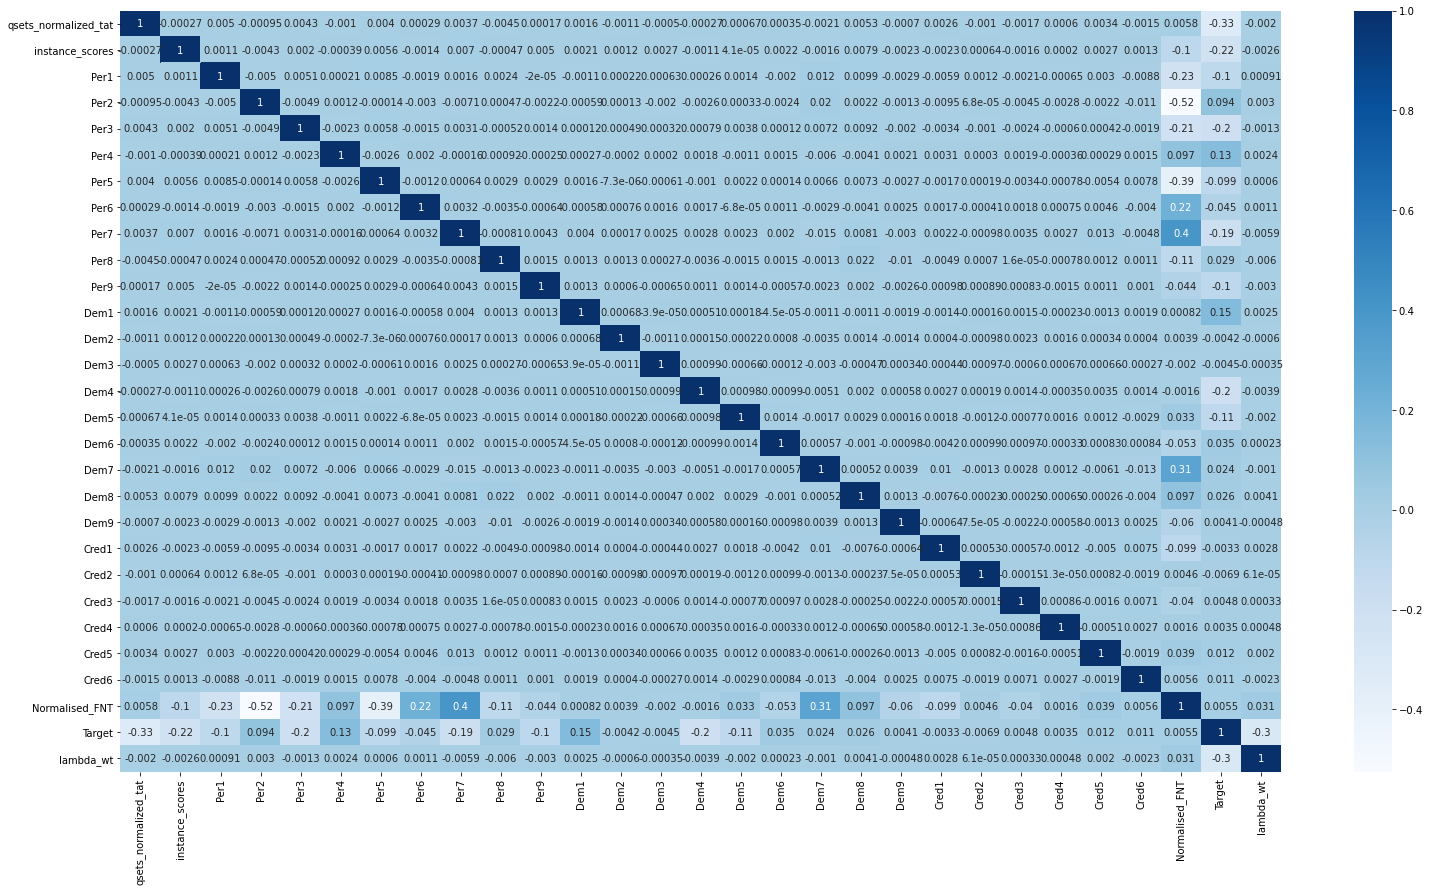

In [39]:
#Checking correlation between the variables and target

plt.figure(figsize=(26, 14))
train_cr = train_cp.corr()

sns.heatmap(train_cr, annot=True, cmap='Blues')
plt.show()

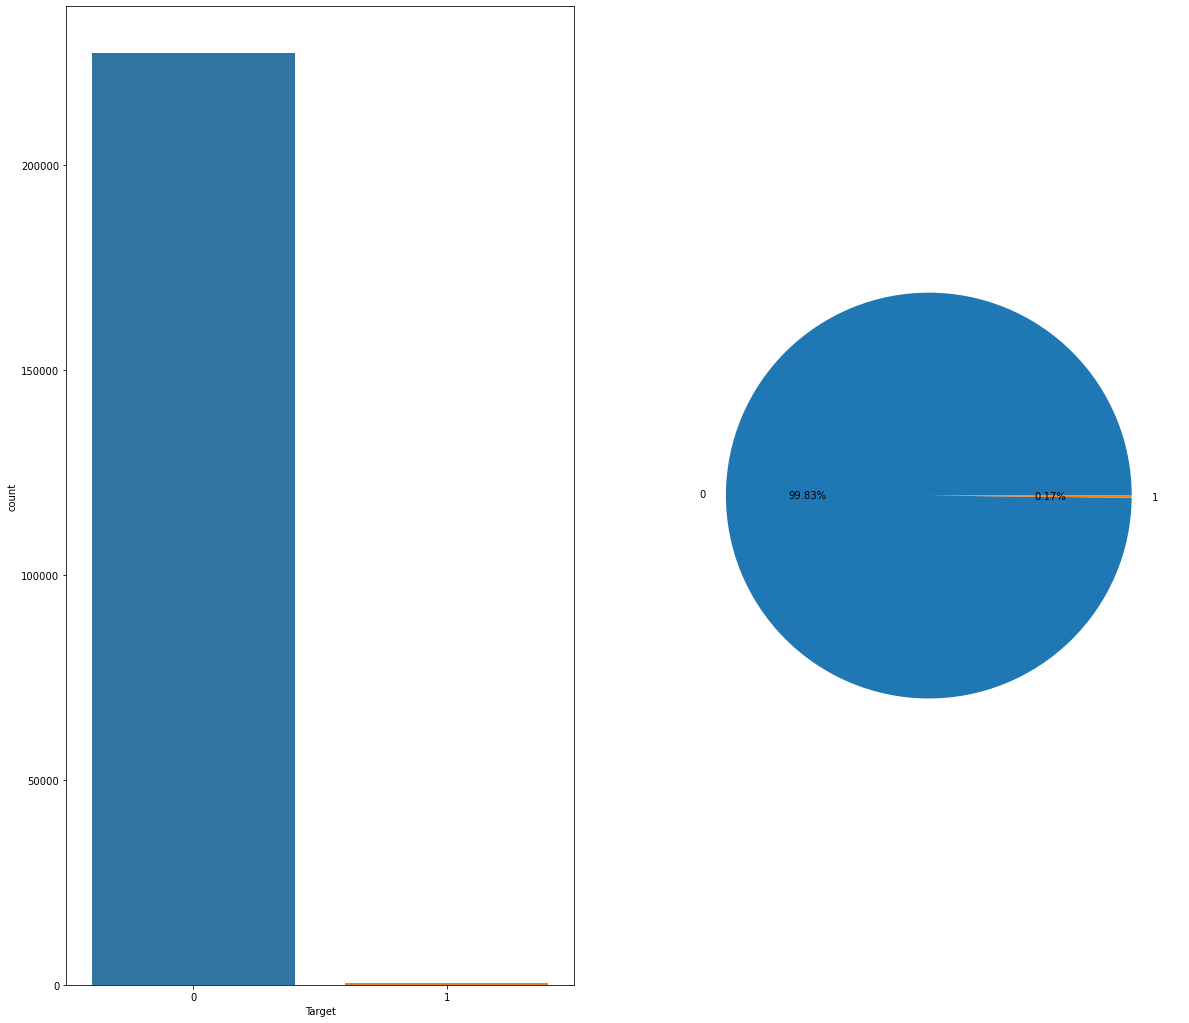

In [40]:
#Checking the distribution for the target

fig, axs = plt.subplots(ncols=2, figsize=(20, 18))

vals = train_['Target'].value_counts().values
label = train_['Target'].value_counts().index

sns.countplot(x = 'Target', data=train_, ax= axs[0])
plt.pie(vals, labels=label, autopct='%0.2f%%')
plt.show()

*Highly imbalanced dataset*

In [41]:
train_cp.head()

,qsets_normalized_tat,instance_scores,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt
0,-0.700,-0.06,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,-0.13
1,0.140,0.52,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,0.66
2,-0.430,1.56,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,-0.51
3,-0.302,0.70,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,0.72
4,-0.630,-0.47,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,0.60


In [42]:
all_cols = list(train_cp.columns)
all_cols.remove('Target')
print(all_cols)

['qsets_normalized_tat', 'instance_scores', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT', 'lambda_wt']


In [43]:
len(all_cols)

28

In [44]:
def dist_plot(df, cols, kind='boxplot'):
    plt.figure(figsize=(20, 16))
    
    for idx, col in enumerate(cols):
        plt.subplot(6, 5, idx+1)
        
        if kind == 'boxplot':
            g = sns.boxplot(x = col, data=df)
            
        elif kind == 'scatter':
            g = sns.scatterplot(x = col, y = train.index, data=df)
            
        elif kind == 'histplot':
            g = sns.histplot(x=col,  data=df, kde=True)
            
    plt.tight_layout()

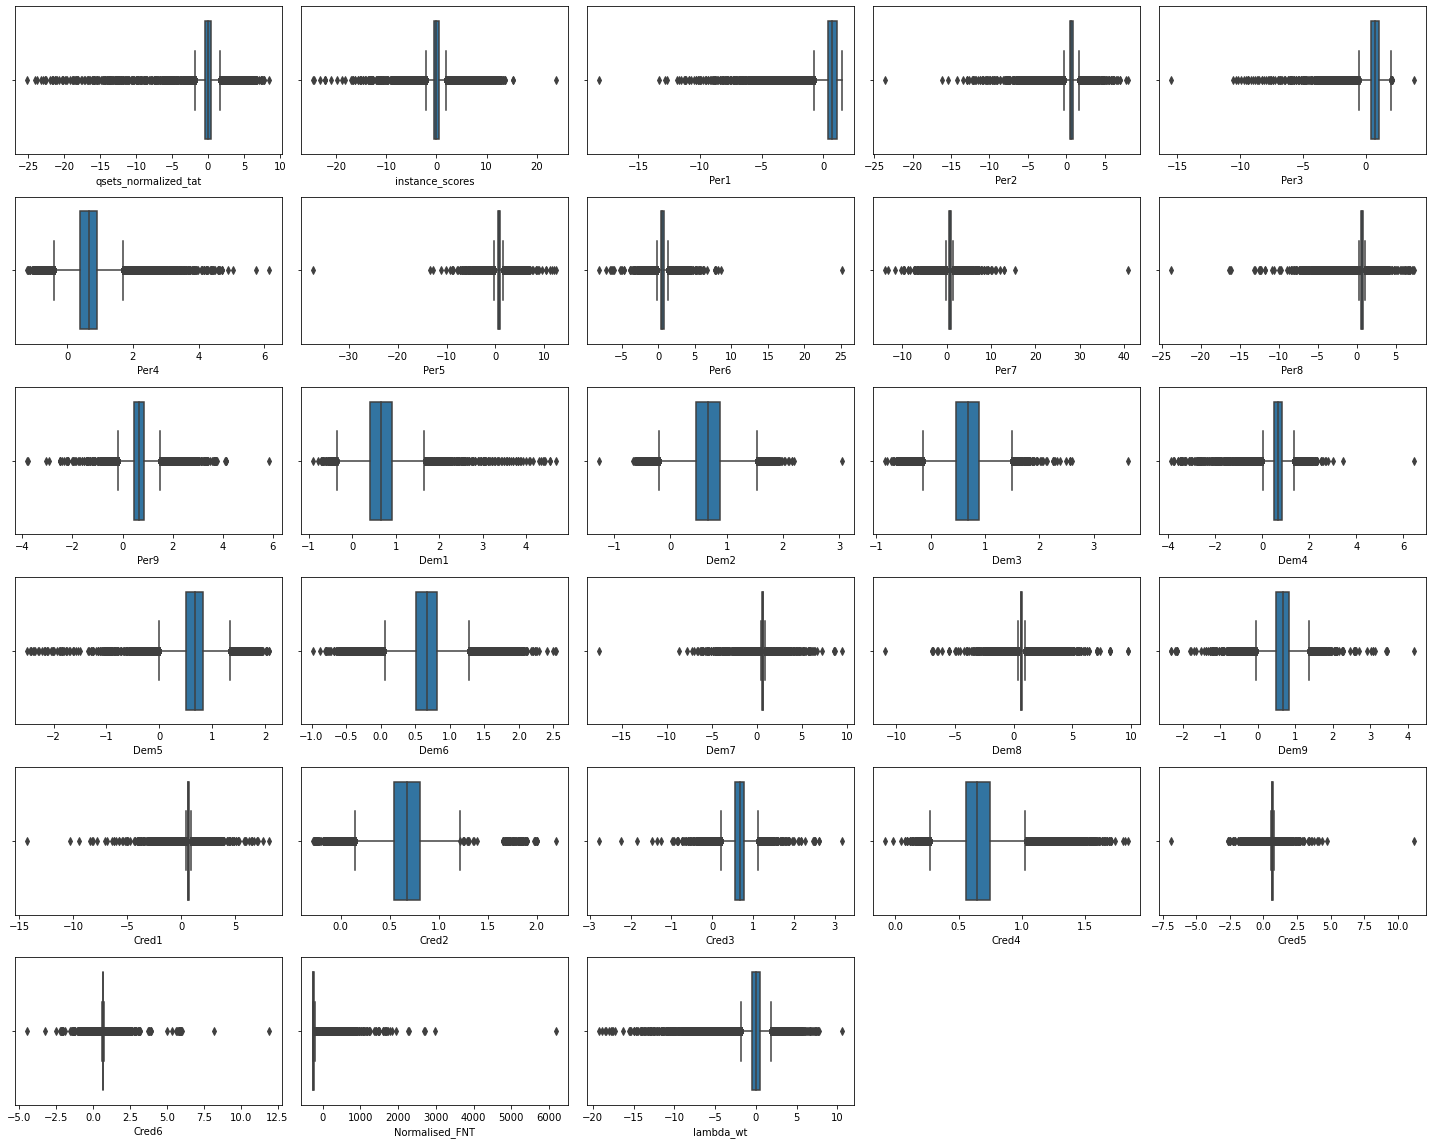

In [45]:
dist_plot(train_cp, all_cols)

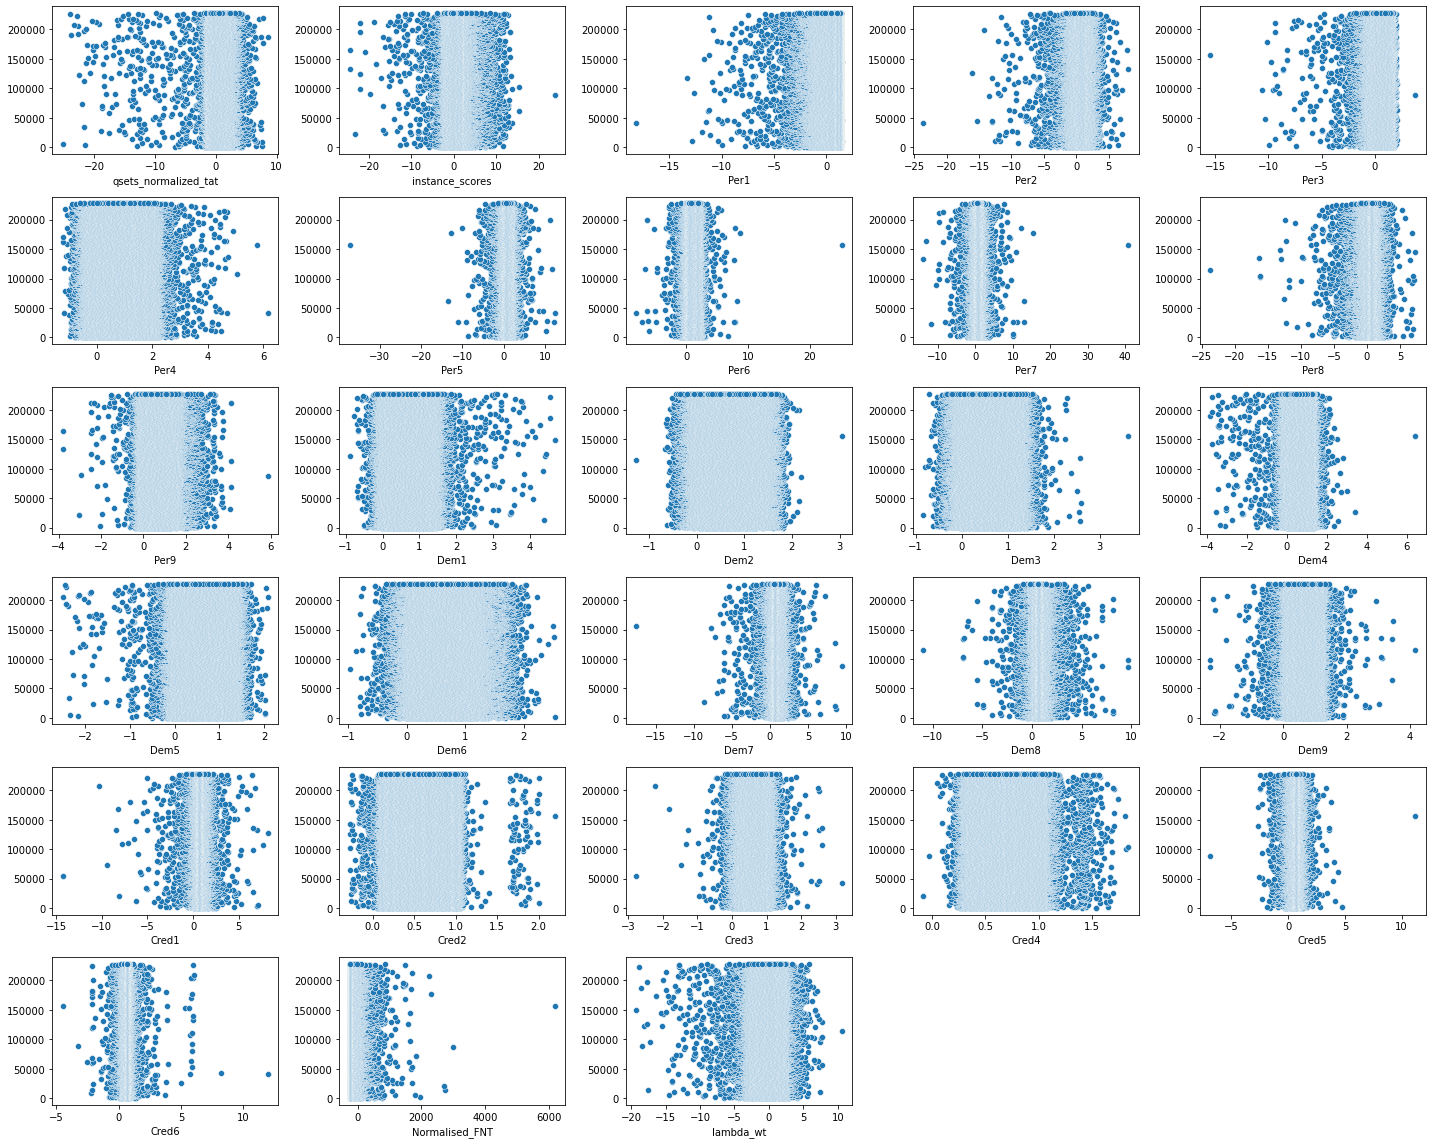

In [46]:
dist_plot(train_cp, all_cols, kind='scatter')

In [47]:
#Unable to run on the local machine without GPU
#dist_plot(train_cp, all_cols, kind='histplot')

In [48]:
def treat_outliers(X, cols):
    df = X.copy()
    for col in cols:
        Q1 = np.percentile(df[col], 25.)
        Q2 = np.percentile(df[col], 50.)
        Q3 = np.percentile(df[col], 75.)
        
        IQR = Q3 - Q1
        upper, lower = Q3 + (1.5 * IQR), Q1 - (1.5 * IQR)
        
        df.loc[(df[col] > upper), col] = upper
        df.loc[(df[col] < lower), col] = lower
        
    return df

In [49]:
train_out = treat_outliers(train_cp, all_cols)
train_out.head()

,qsets_normalized_tat,instance_scores,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt
0,-0.700,-0.06,1.070000,0.580000,0.480000,0.766667,1.233333,1.385000,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,-0.13
1,0.140,0.52,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.563333,0.653333,-248.0000,0,0.66
2,-0.430,1.56,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,-0.51
3,-0.302,0.70,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.776667,0.758333,-249.7775,0,0.72
4,-0.630,-0.47,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,0.60


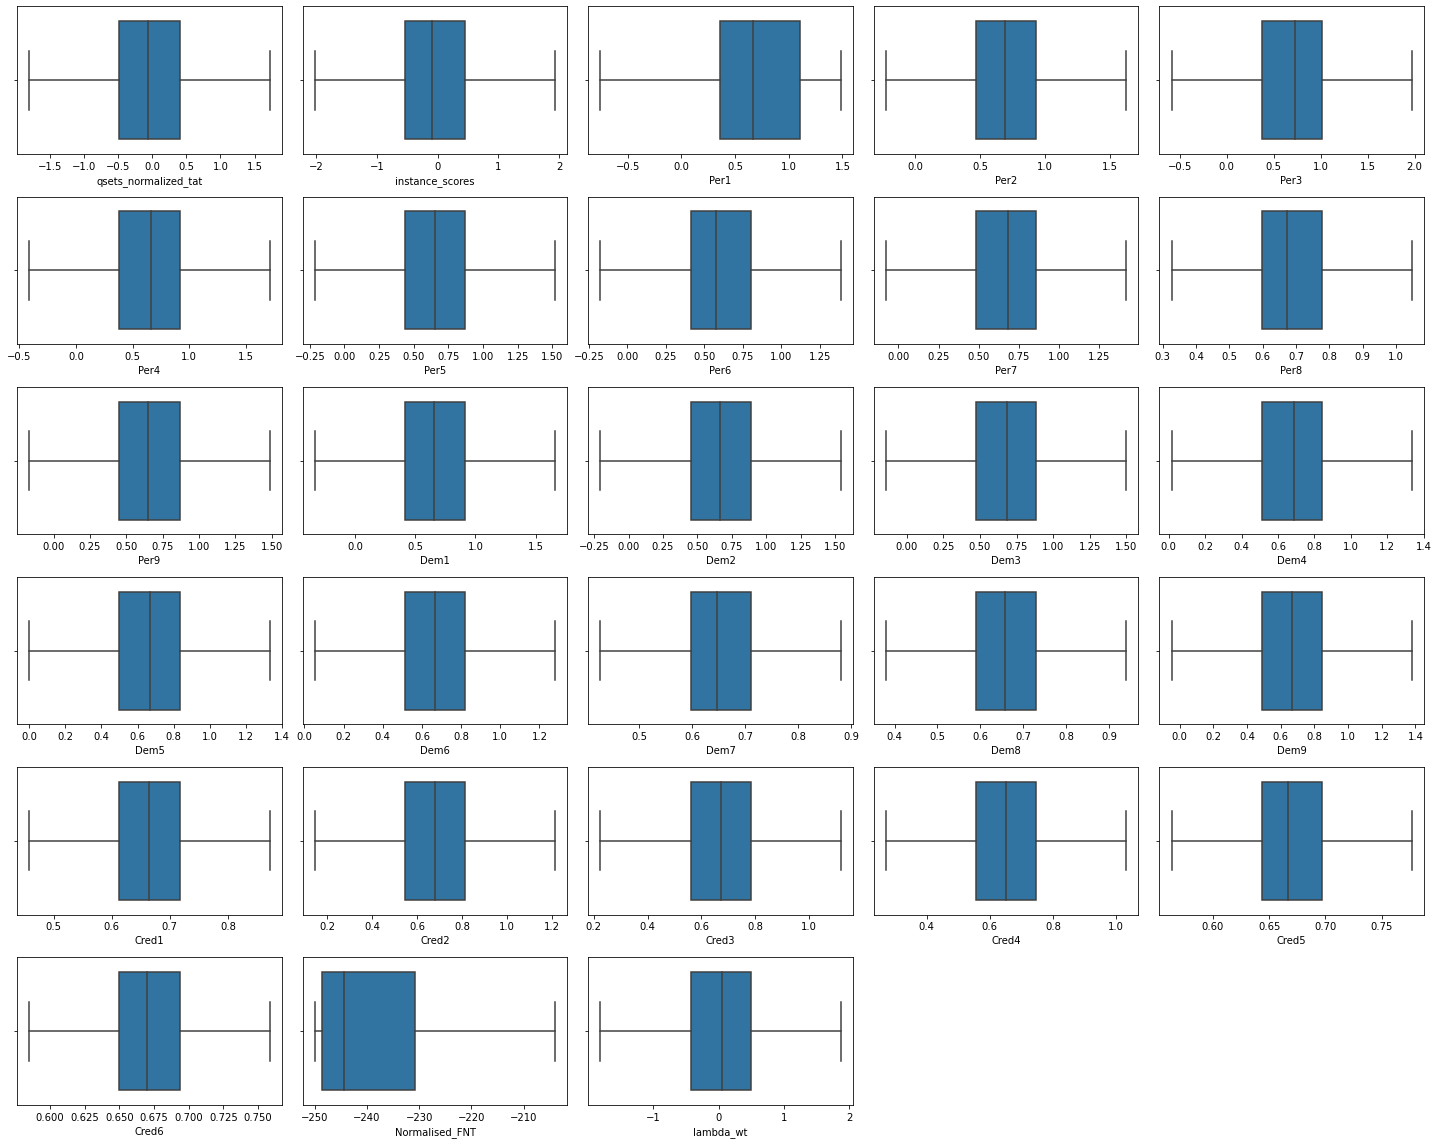

In [50]:
dist_plot(train_out, all_cols)

***Pipeline Creation***

1. Remove dupes and missing values.
2. Create the combo dataset with Qset, lambda, geo & instance.
3. Remove id, group
4. SimpleImputer

In [51]:
# Option 2

# Create pipeline for data aggregation as well? Will consider in V2

# Data Pre-processing

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [83]:
class CustomAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, *idsets, grp):
        self.idsets = idsets
        #self.dsets = __removeDupes(idsets)
        self.grp = grp
        
    def __removeDupes(self, df):
        df = df.fillna(df.median())
        idx = df.columns[0]
        df = df.groupby(idx).mean()
        return df
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        dt = self.idsets
        temp = __removeDupes(dt[0])
        
        for index in range(1, len(dt)):
            df = temp.merge(__removeDupes(idsets[index]), on = 'id')
            temp = __removeDupes(idsets[index])
        df = df.merge(X, on='id', how='right')
        df = df.merge(self.grp, on='Group', how='left')
        return df

In [84]:
customAgg = CustomAggregator(geo, qset, instance, grp=lambd)
customAgg.transform(test)

NameError: name '_CustomAggregator__removeDupes' is not defined

In [75]:
def abc(*idsets, X, grp):
    #print(idsets[0].head())
    for ids in idsets:
        #print(ids.head())
        print(type(ids))
        break;
    temp = idsets[0]
#     for index in range(1, len(idsets)):
#         df = temp.merge(idsets[index], on ='id')
#         temp = idsets[index]
#         df = df.merge(X, on='id', how='right')
#         df = df.merge(grp, on='Group', how='left')
    #return df

In [76]:
abc(geo, instance, X = test, grp=lambd)

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#test_ = getTransformedData(geo_, qset_, instance_, X=test, grp=lambd_)

# def remove_dupes(df):
#     df = df.fillna(df.median())
#     idx = df.columns[0]
#     df_ = df.groupby(idx).mean()
#     return df_

In [60]:
t = [i for i in range(5)]
t

[0, 1, 2, 3, 4]